In [6]:
import pandas as pd
import seaborn as sns
import func
from matplotlib import pyplot as plt

In [7]:
old_df = pd.read_excel("data.xlsx")
#требование: столбик с измерениями называется second

In [8]:
df = pd.DataFrame(old_df['second'])
df = df.dropna()

In [9]:
sr = df['second'].mean()
sm = df['second'].sum()

In [10]:
def create_square_delta(row):
    square = row["delta"]**2
    square = round(square, 4)
    return round(square, 3)

In [11]:
def create_delta(row):
    sec = row['second']
    delta = sec - sr
    return round(delta, 3)


In [12]:
df['delta'] = df.apply(create_delta, axis=1)
df["square_delta"] = df.apply(create_square_delta, axis=1)

In [13]:
df.describe()

,second,delta,square_delta
count,50.000000,50.000000,50.000000
mean,6.352200,0.000200,0.049720
std,0.225427,0.225427,0.082987
min,5.910000,-0.442000,0.000000
25%,6.195000,-0.157000,0.002000
50%,6.350000,-0.002000,0.016500
75%,6.467500,0.115500,0.055000
max,7.020000,0.668000,0.446000


In [14]:
m = round(len(df['second']) ** 0.5) # количество столбцов
mini_pussy = round((max(df['second'])+0.01 - min(df['second'])) / m, 3) # натуральная ширина столбцов

marks = [round(min(df['second']) + mini_pussy*i, 2) for i in range(8)] # границы столбцов



In [15]:
data = {'left_border':[], 'right_border': []}
for left, right in zip(marks, marks[1:]):
    data['left_border'].append(left)
    data['right_border'].append(right)
new_df = pd.DataFrame(data)
new_df

,left_border,right_border
0,5.91,6.07
1,6.07,6.23
2,6.23,6.39
3,6.39,6.55
4,6.55,6.71
5,6.71,6.87
6,6.87,7.03


In [16]:
def delta_N(row):
    left = row['left_border']
    right = row['right_border']
    count = 0
    for i in df['second']:
        if left <= i <= right:
            count+=1
    return count

In [17]:
def left_P(row):
    sm = df['square_delta'].sum()
    sigma = func.find_sigma(sm)
    left =func.P(t=row['left_border'], sigma=sigma, sr=sr)
    return round(left, 3)

def right_P(row):
    sm = df['square_delta'].sum()
    sigma = func.find_sigma(sm)
    right = func.P(t=row['right_border'], sigma=sigma, sr=sr)
    return round(right,3)

sm = df['square_delta'].sum()
sigma = func.find_sigma(sm)
p =round(func.P(t=new_df['left_border'][0], sigma=sigma, sr=sr),3)
p # для примера расчётов

0.25

In [18]:
def hz(row, N = 50, mini_pussy = 0.16):
    dN = row['delta_N']
    return dN / (N * mini_pussy)

In [19]:
new_df['delta_N'] = new_df.apply(delta_N,axis=1)
new_df['pr'] = new_df.apply(hz, axis=1)
new_df['left_P'] = new_df.apply(left_P, axis=1)
new_df['right_P'] = new_df.apply(right_P, axis=1)

In [20]:
sigma_data = {
    'от':[],
    'до':[],
    'N12': [],
    'N12 / N':[],
    'P12' : [None, None, None]}
for j in range(1, 4): 
    lf = round(sr - j*sigma, 3)
    rt = round(sr + j*sigma, 3)
    sigma_data['от'].append(lf)
    sigma_data['до'].append(rt)
    count = 0
    for i in df['second']:
        if lf <=i <=rt:
            count +=1
    sigma_data['N12'].append(count)
    sigma_data['N12 / N'].append(count / len(df['second']))


table = pd.DataFrame(sigma_data, index=[1,2,3])
table

,от,до,N12,N12 / N,P12
1,6.129,6.575,37,0.74,None
2,5.906,6.798,48,0.96,None
3,5.683,7.021,50,1.00,None


In [21]:
new_df

,left_border,right_border,delta_N,pr,left_P,right_P
0,5.91,6.07,6,0.750,0.250,0.803
1,6.07,6.23,7,0.875,0.803,1.540
2,6.23,6.39,18,2.250,1.540,1.764
3,6.39,6.55,11,1.375,1.764,1.207
4,6.55,6.71,5,0.625,1.207,0.494
5,6.71,6.87,1,0.125,0.494,0.121
6,6.87,7.03,2,0.250,0.121,0.018


<Axes: ylabel='Frequency'>

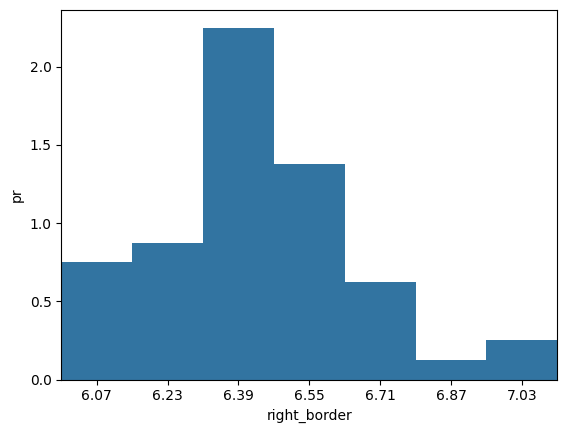

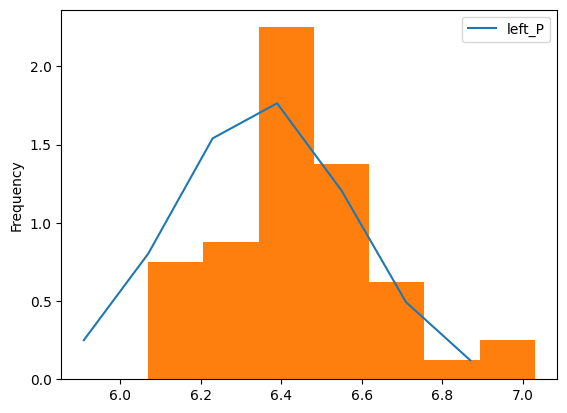

In [24]:
sns.barplot(data= new_df, y ='pr', x= 'right_border', width=1)
new_df.plot.line(x='left_border', y = 'left_P')
new_df['right_border'].plot.hist(bins = m, weights =new_df['pr'])